In [15]:
import hmip
import math
import numpy as np
import matplotlib.pyplot as plt

## Application to economic load dispatch

### Define parameters

In [199]:
n = 20
rho = 10
step_size_dual = 0.1
num_dual_iter = 300

alpha = 1 + np.random.rand()
beta = np.random.rand()
p = np.random.rand(n)
sigma = np.random.rand(n, n)
# K = math.floor(n/2)

sigma = sigma.T @ sigma
    
# for k in range(K):
#     v = np.random.rand(n)
#     lam = 0.1 * np.random.rand()
#     print(lam)
#     sigma = sigma + lam * (v * v.T)

    
x_0 = np.round(np.random.rand(n))
y_0 = np.multiply(np.random.rand(n), x_0)
d = (1 + 0.1 * (np.random.rand() - 0.5)) * np.sum(y_0)
binary_index = np.concatenate((np.ones(n), np.zeros(n)))
activ_param = np.concatenate((50 * np.ones(n), np.ones(n)))

x_init = np.ones(n)
for k in range(n):
    if x_0[k] == 1:
        x_init[k] = 0.7
    else:
        x_init[k] = 0.3
        
z_init = np.concatenate((x_init, y_0))

ub = np.ones(2 * n)
lb = np.zeros(2 * n)

### Define Objective and Gradient

In [200]:
def objective_function(x, y):
    return p.T @ y + 0.5 * alpha * np.linalg.norm(x - x_0)**2 + 0.5 * beta * np.linalg.norm(y - y_0)**2 + 0.5 * y.T @ sigma @ y


def lagrangian(x, y, lambda_1, lambda_2):
    return objective_function(x, y) + lambda_1 * (x.T @ y - d) + 0.5 * rho * (x.T @ y - d)**2 + \
    lambda_2 * (np.ones(n).T @ y - d) + 0.5 * rho * (np.ones(n).T @ y - d)**2


def gradient_lagrangian(x, y, lambda_1, lambda_2):
    return np.concatenate((alpha * (x - x_0) + lambda_1 * y + rho * (y @ y.T * x - d * y),
                     p + beta * (y - y_0) + sigma @ y + lambda_1 * x + rho * (x @ x.T * y - d * x) + \
                     lambda_2 * np.ones(n) + rho * (np.ones((n, n)) @ y - d * np.ones(n))))

                                               
objective_hist = np.zeros(num_dual_iter)
lambda_1_hist = np.zeros(num_dual_iter)
lambda_2_hist = np.zeros(num_dual_iter)

### Hopfield Dual Method

In [201]:
## Initialization
lambda_1 = 0
lambda_2 = 0

solver = hmip.HopfieldSolver(
    activation_type='pwl',
    gamma=0.9,
    theta=0.2,
    ascent_stop_criterion=0.1,
    absorption_criterion=None,
    max_iterations=100,
    stopping_criterion_type='gradient',
    direction_type='classic',
    step_type='classic',
    initial_ascent_type='binary_neutral_ascent',
    precision_stopping_criterion=10**-4,
    beta=activ_param
)

for dual_iter in range(num_dual_iter):
    def objective(z):
        return lagrangian(z[:n], z[n:], lambda_1, lambda_2)
    
    def gradient(z): 
        return gradient_lagrangian(z[:n], z[n:], lambda_1, lambda_2)

    problem = solver.setup_optimization_problem(
        objective, 
        gradient, 
        lb, 
        ub, 
        binary_index, 
        x_0=z_init,
    )
    
    z, z_h, f_val_hist, step_size, other_dict = solver.solve(problem)
    
    objective_hist[dual_iter] = f_val_hist[-1]
    
    lambda_1_hist[dual_iter] = lambda_1
    lambda_2_hist[dual_iter] = lambda_2
    
    lambda_1 = lambda_1 + step_size_dual * (z[:n, -1].T @ z[n:, -1] - d)
    lambda_2 = lambda_2 + step_size_dual * (np.ones(n).T @ z[n:, -1] - d)
    
    print('---- updated lambdas ----')
    
    
def objective(z):
    return lagrangian(z[:n], z[n:], lambda_1, lambda_2)
    
def gradient(z): 
    return gradient_lagrangian(z[:n], z[n:], lambda_1, lambda_2)
    
problem = solver.setup_optimization_problem(
    objective, 
    gradient, 
    lb, 
    ub, 
    binary_index, 
    x_0=z_init,
    )
    
z, z_h, f_val_hist, step_size, other_dict = solver.solve(problem)

x_hop = np.round(z[:n, -1], 6)
y_hop = np.round(z[n:, -1], 6)

Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual known
Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual known
Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual known
Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual known
Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual kn

Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual known
Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual known
Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual known
Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual known
Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness

Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual known
Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual known
Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual known
Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual known
Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness

Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual known
Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual known
Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual known
Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual known
Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness

Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual known
Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual known
Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual known
Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual known
Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness

Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual known
Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual known
Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual known
Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual known
Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness

Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual known
Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual known
Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual known
Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual known
Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness

Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual known
Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual known
Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual known
Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness coef
.... Optimization problem set up.
Solving optimization problem ....
Dual known
Candidate solution found with 99 number of iterations.
---- updated lambdas ----
Set up optimization problem ....
compute smoothness

sd_cv: 0.09727601745002046
Binary variable: 0.019330389742100003
cost: 39.494269602924014
demand: 3.5316883321640207


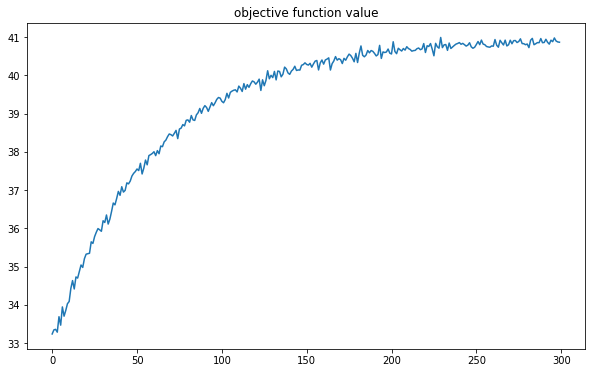

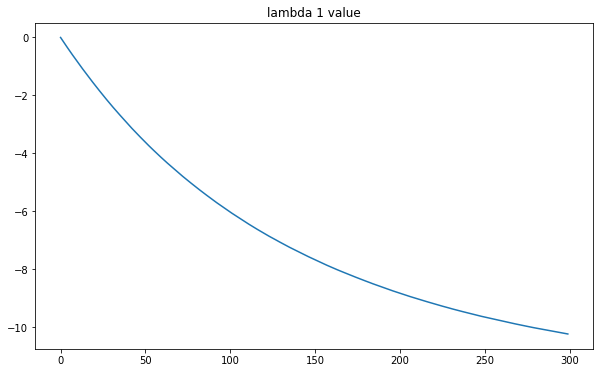

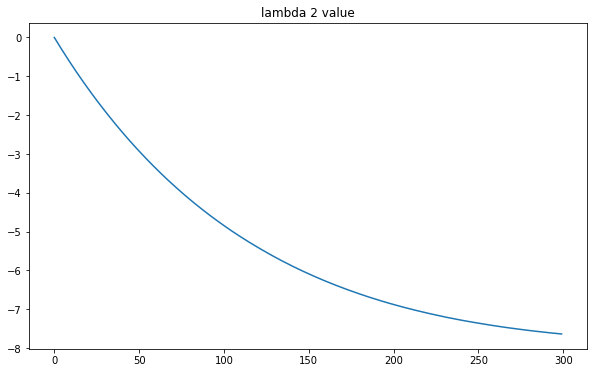

In [202]:
print('sd_cv: %s' % np.abs(x_hop.T @ y_hop - d))
print('Binary variable: %s' % (x_hop.T @ (1 - x_hop) / n))
print('cost: %s' % objective_function(x_hop, y_hop))
print('demand: %s' % d)

# plots
plt.figure(figsize=(10, 6))
plt.plot(objective_hist)
plt.title('objective function value')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(lambda_1_hist)
plt.title('lambda 1 value')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(lambda_2_hist)
plt.title('lambda 2 value')
plt.show()

### Comparison with cvxpy

In [207]:
import cvxpy as cvx
  
y = cvx.Variable(n)
objective = cvx.Minimize(p.T * y + 0.5 * beta * cvx.square(cvx.pos(cvx.norm(y-y_0))) + 0.5 * cvx.quad_form(y, sigma))
constraints = [
    cvx.sum(y) == d,
    0 <= y,
    y <= 1,
]

problem = cvx.Problem(objective, constraints)
problem.solve()

y_cvx = np.round(y.value, 3)
x_cvx = np.where(y_cvx != 0, 1, 0)

print('sd_cv: %s' % np.abs(x_cvx.T @ y_cvx - d))
print('solution: %s' % (np.concatenate((x_cvx, y_cvx))))
print('cost: %s' % objective_function(x_cvx, y_cvx))
print('demand: %s' % d)

[0.    0.653 0.451 0.45  0.    0.    0.472 0.109 0.396 0.    0.    0.
 0.    1.    0.    0.    0.    0.    0.    0.   ]
sd_cv: 0.0006883321640209772
solution: [0.    1.    1.    1.    0.    0.    1.    1.    1.    0.    0.    0.
 0.    1.    0.    0.    0.    0.    0.    0.    0.    0.653 0.451 0.45
 0.    0.    0.472 0.109 0.396 0.    0.    0.    0.    1.    0.    0.
 0.    0.    0.    0.   ]
cost: 33.578986879161135
demand: 3.5316883321640207
